<a href="https://colab.research.google.com/github/Sujan078BCT/Python-Programming/blob/main/session_9_oop_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Class Relationships

- Aggregation
- Inheritance

**There are only private and public access specifier in python but not protected**

### Aggregation(Has-A relationship)
- one class owns the other class i.e one class is owner of another class.
- Technically, During creation of owner class object, other class object is passed as arguments in constructor of owner class.
- Owner class cannot access private attributes of other class. So, need to use getter or setter method (recommended) and _className__private_attributes(not recommended)
e.g:
```
class Customer:
  pass
class Address:
  pass

Customer has A Address i.e Customer class owns Adress class.
```

```
class Restaurant:
  pass
class Menu:
  pass

Restaurant has A Menu i.e Restaurant class owns menu class.
Relationship between Restaurant and Menu class is Has A relationship.
```

In [ ]:
# example
class Customer: #owner class

  def __init__(self,name,gender,address):
    self.name = name # It is a simple text
    self.gender = gender # Either male or Female
    self.address = address # complex (country,state,city,street,email_address,phone_no,zip-code,pincode) -> make it as object

  def print_address(self):
    print(self.address.get_city(),self.address.pin,self.address.state)
    # print(self.address._Address__city,self.address.pin,self.address.state)

  def edit_profile(self,new_name,new_city,new_pin,new_state):
    self.name = new_name
    self.address.edit_address(new_city,new_pin,new_state)

class Address:

  def __init__(self,city,pin,state):
      self.__city = city
      self.pin = pin
      self.state = state

  def get_city(self):
    return self.__city

  def edit_address(self,new_city,new_pin,new_state):
    self.__city = new_city
    self.pin = new_pin
    self.state = new_state

add1 = Address('gurgaon',122011,'haryana')
# cust must have name 'nitish', gender 'male' and address of Address Class i.e add1
# passing object in Customer constructor.
cust = Customer('nitish','male',add1)

# cust = Customer('nitish','male',Address('guragaon',122011,'haryana'))

cust.print_address()

cust.edit_profile('ankit','mumbai',111111,'maharastra')
cust.print_address()
# method example
# what about private attribute

gurgaon 122011 haryana
mumbai 111111 maharastra


##### Aggregation class diagram
- Diamond or Rhombus sign is toward owner class.
- Customer Has A Address.

**Fig: Class Diagram of Aggregation.**

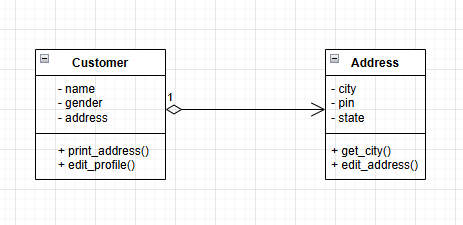

### Inheritance

- What is inheritance
- Example
- What gets inherited?

###**Inheritance and it's benefits**
- Code Reusability

In [3]:
# Example

# parent
class User:

  def __init__(self):
    self.name = 'nitish'
    self.gender = 'male'

  def login(self):
    print('login')

# child
class Student(User): # Student class inherited from User class

  def __init__(self):
    self.rollno = 100

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
s.login()
s.enroll()

#The error occured because __init__() i.e constructor method overwrites.

AttributeError: 'Student' object has no attribute 'name'

**Note- Always child method/constructor get executed, if not present then only parent constructor/method get executed/called.**

**Problem**
- Method Overriding
```
When creating instance of Student class,
if constructor of its own class is present, it calls it own constructor but donot call its parent constructor
because its own constructor overwrites its parent constructor
But, if constructor of its own class is absent, it inherits constructor from parent class and call its.
```

**Solution**
- Calling overwrites parent constructor using super keyword.

In [ ]:
# Example

# parent
class User:

  def __init__(self):
    self.name = 'nitish'
    self.gender = 'male'

  def login(self):
    print('login')

# child
class Student(User): # Student class inherited from User class

  def __init__(self):
    self.rollno = 100
    super().__init__() # calling super class __init__ method

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
s.login()
s.enroll()

nitish
login
enroll into the course


**Class Diagram of Inheritance**
- Arrow head is towards parent.

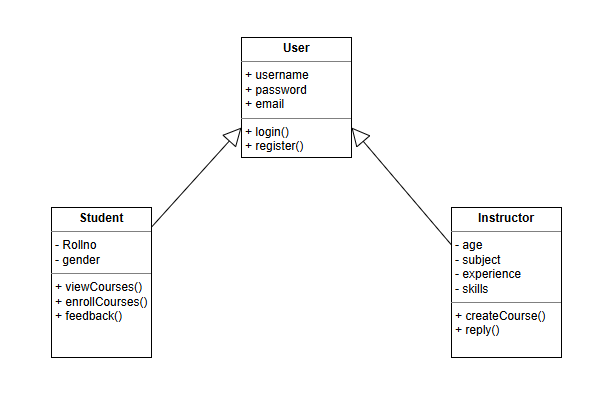

**Fig: Class Diagram of Inheritance**

In [ ]:
# constructor example - All method (including constructor ) and attributes(not private) are inherited to child class.

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 13)
s.buy()

Inside phone constructor
Buying a phone


In [10]:
# constructor example 2 - If same method or constructor is present in both parent and child class, child class method will overwrite inherit parent method and
# only child method/constructor is called but not parent method.

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, os, ram):
        self.os = os
        self.ram = ram
        print ("Inside SmartPhone constructor")

s=SmartPhone("Android", 2)
s.brand # since Phone class constructor is never called and attributes(__price,brand,camera are never initialized in memory.)

Inside SmartPhone constructor


AttributeError: 'SmartPhone' object has no attribute 'brand'

In [9]:
# child can't access private members of the class

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand

        self.camera = camera

    #getter
    def show(self):
        print (self.__price)

class SmartPhone(Phone):
    def check(self):
        print(self.__price) # try to access private attributes of parent class which results in error.

s=SmartPhone(20000, "Apple", 13)
s.show()
s.check()

Inside phone constructor
20000


AttributeError: 'SmartPhone' object has no attribute '_SmartPhone__price'

In [ ]:
# Question: What will be output?
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def show(self):
        print("This is in child class")

son=Child(100)
print(son.get_num())
son.show()

In [ ]:
# Question: What will be output?
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def __init__(self,val,num):
        self.__val=val

    def get_val(self):
        return self.__val

son=Child(100,10)
print("Parent: Num:",son.get_num())
print("Child: Val:",son.get_val())

AttributeError: ignored

In [12]:
# Question: What will be output?
class A:
    def __init__(self):
        self.var1=100

    def display1(self,var1):
        print("class A :", self.var1)
class B(A):

    def display2(self,var1):
        print("class B :", self.var1)

obj=B()
obj.display1(200)

class A : 100


**Method Overriding**
- When child and parent class have same method or constructor name, then child class method will get executed but not parent class method.

In [14]:
# Method Overriding
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


### Super Keyword
- always used inside child class but not outside class(when used throw error)
- used to access parent method by calling super keyword during method overriding.
- cannot have access to attributes(neither parent nor child).
- super() is an inbuilt function which is used to invoke the parent class methods and constructor

**3 Keywords are usually Asked in Interview**
- self
- static
- super

In [27]:
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        super().buy()

s=SmartPhone(20000, "Apple", 13)

s.super().buy() # calling super keyword outside the class results into error.

Inside phone constructor


AttributeError: 'SmartPhone' object has no attribute 'super'

In [30]:
# can super access parent ka data? -> No
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        print(super().brand) # trying to access parent class attributes which results into error.

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


AttributeError: 'super' object has no attribute 'brand'

In [33]:
# super ->constructor # initializing both child and parent constructor
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, price, brand, camera, os, ram):
        print('Inside smartphone constructor')
        super().__init__(price, brand, camera)
        self.os = os
        self.ram = ram
        print ("Inside smartphone constructor")

s=SmartPhone(20000, "Samsung", 12, "Android", 2)

print(s.os)
print(s.brand)

Inside smartphone constructor
Inside phone constructor
Inside smartphone constructor
Android
Samsung


##### Inheritance in summary

- A class can inherit from another class.

- Inheritance improves code reuse

- Constructor, attributes, methods get inherited to the child class

- The parent has no access to the child class

- Private properties of parent are not accessible directly in child class

- Child class can override the attributes or methods. This is called method overriding

- super() is an inbuilt function which is used to invoke the parent class methods and constructor

In [ ]:
class Parent:

    def __init__(self,num):
      self.__num=num

    def get_num(self):
      return self.__num

class Child(Parent):

    def __init__(self,num,val):
      super().__init__(num)
      self.__val=val

    def get_val(self):
      return self.__val

son=Child(100,200)
print(son.get_num())
print(son.get_val())

100
200


In [ ]:
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self):
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [ ]:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


### Types of Inheritance(5)

- Single Inheritance
  - one parent , one child
  - child inherits from parent.
- Multilevel Inheritance
  - eg: child inherits from father, father inherits from grandfather,so, child inherits attributes and method from both father and grandfather i.e child can access attributes and method of both fatehr and grandfather.
  - can have infinite chain of inheritance in both direction.
- Hierarchical Inheritance
  - one parent, multiple child
- Multiple Inheritance(Diamond Problem)
  - one single class inherited from multiple class.
  - multiple parent, one child
  - java donot allow multiple inheritance because it can have ambugity

- Hybrid Inheritance
  - combination of different types of inheritance.

**Fig: Different Types of Inheritance**
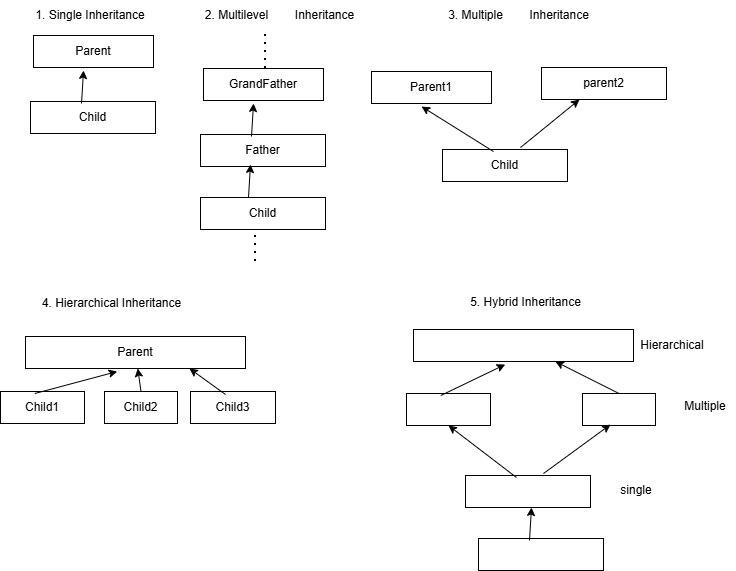

In [ ]:
# single inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()

Inside phone constructor
Buying a phone


In [ ]:
# multilevel
class Product:
    def review(self):
        print ("Product customer review")

class Phone(Product):
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Product customer review


In [ ]:
# Hierarchical
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

class FeaturePhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()
FeaturePhone(10,"Lava","1px").buy()

Inside phone constructor
Buying a phone
Inside phone constructor
Buying a phone


In [ ]:
# Multiple
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def review(self):
        print ("Customer review")

class SmartPhone(Phone, Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()


Inside phone constructor
Buying a phone
Customer review


**Method Resolution Order**
- used to resolve ambugity/conflict in multiple inheritance
- class which is written first in () will have highest priority
```
- e.g: class A(B,C):
         pass
  B is written first, so B will have highest priority than class C.
  When same method are present in both class i.e B and C, A will inherit method from highest priority class i.e from B.

```

In [36]:
# the diamond problem
# https://stackoverflow.com/questions/56361048/what-is-the-diamond-problem-in-python-and-why-its-not-appear-in-python2
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def buy(self):
        print ("Product buy method")

# Method resolution order -> class which is first inherited or written first in () will have highest priority
class SmartPhone(Phone,Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy() # will call method of that parent class which is written first while inheriting i.e SmartPhone(Phone->written first, Product-> written second) because first have higher priority than second.

Inside phone constructor
Buying a phone


In [ ]:
# multilevel inheritance
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        return 30

    def m2(self):
        return 40

class C(B):

    def m2(self):
        return 20
obj1=A()
obj2=B()
obj3=C()
print(obj1.m1() + obj3.m1()+ obj3.m2())

70


In [1]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        val=super().m1()+30
        return val

class C(B):

    def m1(self):
        val=self.m1()+20 # goes in looping because calling same method due to method overriding
        return val
obj=C()
print(obj.m1())

RecursionError: maximum recursion depth exceeded

### Polymorphism
- having multiple or different forms/phases
- same thing behave different according to situation or scenarios.

#### 3 Main Concepts in Polymorphism
- Method Overriding (bascially in inheritance)
- Method Overloading
- Operator Overloading

**2. Method Overloading**
- Having multiple method with same name but different behavior depending upon input i.e no. of parameters in class.
- Need :
  - Code is more cleaner and increase code readibility.
- Method Overloading is not in python unlike in c++ and java because can implement such by using default arguments.

In [9]:
class Shape:
  def area_circle(self,radius):
    return 3.14*radius*radius

  def area_rectangle(self,l,b):
    return l*b

s = Shape()
print(s.area_circle(3.14))
print(s.area_rectangle(2,3))

30.959144000000002
6


In [10]:
# two area having same name but different behavior based on no. of parameters and implementation i.e one for circle and another for rectangle
class Shape:
  def area(self,radius): # method1
    return 3.14*radius*radius

  def area(self,l,b): # method2
    return l*b

s = Shape()
print(s.area(3.14)) # one argument is given,method1 get executed.
print(s.area(2,3)) # 2 argument is given, method2 get executed.
# But Method overloading is not possible in python

TypeError: Shape.area() missing 1 required positional argument: 'b'

In [ ]:
# implementing method overloading functionality using default arguments but it is not method overloading.
class Shape:

  def area(self,a,b=0):
    if b == 0:
      return 3.14*a*a
    else:
      return a*b

s = Shape()

print(s.area(2))
print(s.area(3,4))

12.56
12


**3. Operator Overloading**
- same operator but depending upon input type, its behavior is different.
- implemented using magic or dunder methods. e.g: `__add__,__sub__,__mul__,`etc
```
- eg: + => when used with number, it performs addition.
        => when used with string, it perform concatenation.
        => when used with list, it perform merging.
```

In [ ]:
'hello' + 'world'

'helloworld'

In [ ]:
4 + 5

9

In [ ]:
[1,2,3] + [4,5]

[1, 2, 3, 4, 5]

### Abstraction

In [ ]:
from abc import ABC,abstractmethod
class BankApp(ABC):

  def database(self):
    print('connected to database')

  @abstractmethod
  def security(self):
    pass

  @abstractmethod
  def display(self):
    pass


In [ ]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

  def security(self):
    print('mobile security')

  def display(self):
    print('display')

In [ ]:
mob = MobileApp()

In [ ]:
mob.security()

mobile security


In [ ]:
obj = BankApp()

TypeError: ignored